In [1]:
import scipy as sp
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy.signal import welch
import scipy.io


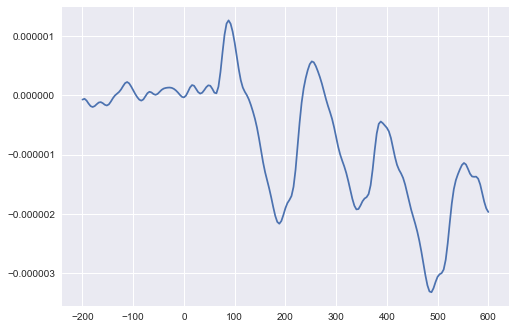

In [2]:
m = sp.io.loadmat('S01.mat')
mm = m['data']

#los datos vienen en la forma: epoch X Electrodo X serie temporal

#epoch X serie temporal
elect8 = mm[:,7,:]
elect44 = mm[:,43,:]
elect80 = mm[:,79,:]
elect131 = mm[:,130,:]
elect185 = mm[:,184,:]

df8 = pd.DataFrame(elect8)
df44 = pd.DataFrame(elect44)
df80 = pd.DataFrame(elect80)
df131 = pd.DataFrame(elect131)
df185 = pd.DataFrame(elect185)

#promedio de serie temporal x epoch. (matriz de 1 epoch con la serie promediada.)
df8_Media = df8.mean(axis=0)
df44_Media = df44.mean(axis=0)
df80_Media = df80.mean(axis=0)
df131_Media = df131.mean(axis=0)
df185_Media = df185.mean(axis=0)

plt.plot(np.linspace(-200, 600, 201), df8_Media)
plt.show()

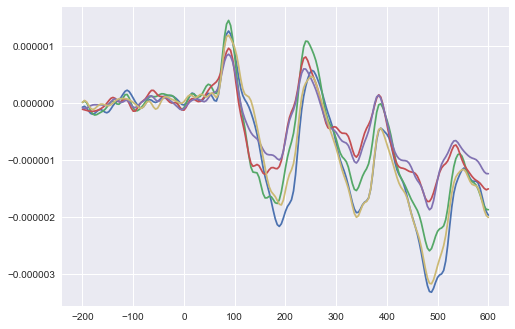

In [3]:
plt.plot(np.linspace(-200, 600, 201), df8_Media)
plt.plot(np.linspace(-200, 600, 201), df44_Media)
plt.plot(np.linspace(-200, 600, 201), df80_Media)
plt.plot(np.linspace(-200, 600, 201), df131_Media)
plt.plot(np.linspace(-200, 600, 201), df185_Media)
plt.show()

In [4]:
#heatmap de elect80 fourier
# welch8 = sp.signal.welch(elect8, noverlap=100, fs=250)
# welch44 = sp.signal.welch(elect44, noverlap=100, fs=250)
# welch131 = sp.signal.welch(elect131, noverlap=100, fs=250)
# welch185 = sp.signal.welch(elect185, noverlap=100, fs=250)
# #welch[0] Me da el rango de frecuencias de elect
# print(welch80[0].shape)
# #welc[1] Me da una matriz de epoch X las frecuencias
# print(welch80[1].shape)
# #como queremos que el eje x sea los epochs transponemos welch[1]
# sn.heatmap(np.transpose(welch80[1]))
# plt.show()

#falta arreglar colores y etiquetas y hacer el promedio de todos los heatmaps(5 electrodos).

/Users/fer/anaconda/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


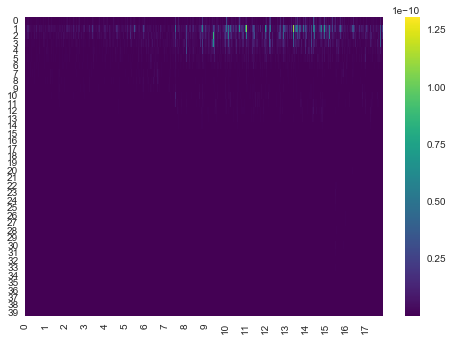

In [5]:
welch8 = sp.signal.welch(elect8, noverlap=100, fs=250)
index8 = (np.abs(welch8[0]-50)).argmin()
potencias8 = welch8[1][:, :index8]

welch44 = sp.signal.welch(elect44, noverlap=100, fs=250)
index44 = (np.abs(welch44[0]-50)).argmin()
potencias44 = welch44[1][:, :index44]

welch80 = sp.signal.welch(elect80, noverlap=100, fs=250)
index80 = (np.abs(welch80[0]-50)).argmin()
potencias80 = welch80[1][:, :index80]

welch131 = sp.signal.welch(elect131, noverlap=100, fs=250)
index131 = (np.abs(welch131[0]-50)).argmin()
potencias131 = welch131[1][:, :index131]

welch185 = sp.signal.welch(elect185, noverlap=100, fs=250)
index185 = (np.abs(welch185[0]-50)).argmin()
potencias185 = welch185[1][:, :index185]

for (x,y), value in np.ndenumerate(potencias8):
    potencias185[x][y] = (potencias8[x][y] + potencias44[x][y] + potencias80[x][y] + potencias131[x][y] + potencias185[x][y]) / 5
        
sn.heatmap(np.transpose(potencias185), cmap='viridis')
listbla = [50 * x for x in range(0,18)]
plt.xticks(listbla)
plt.show()


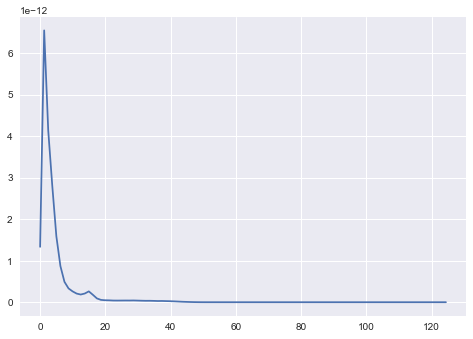

In [6]:
#promedio de potencias de frecuencias por epoch
plt.plot(welch80[0],np.transpose(welch80[1].mean(axis=0)))
plt.show()

#hacer este grafico para los otros electrodos y plotear en el mismo grafico + belleza